## Scopus Analyses

Written by A. R. Azari - 5/20/2020 for rudimentary analyses of the trends in ML literature over the course of the last decade across NASA divisions.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#read in relevant data
names  = ['ML+Planetary', 'Planetary', 
          'ML+Earth', 'Earth', 
          'ML+HelioSP', 'HelioSP', 
          'ML+Astro', 'Astro']

searchTime = 'End2022Results'

frames = {}

for n in names:
    frames[n] = pd.read_csv('./Data/' + searchTime + '/' + n + '.csv', header = 2)
    frames[n].index = frames[n].Year.values.copy()
    #print(frames[n].index)
    frames[n] = frames[n].reindex(index = np.arange(int(1950), int(2023)))
    #print(frames[n].index)

In [9]:
#and make final normalized datasets by dividing over range 1950-2020

frames['ML+Planetary']['Total'] = frames['Planetary'].Papers
frames['ML+Earth']['Total']     = frames['Earth'].Papers
frames['ML+HelioSP']['Total']   = frames['HelioSP'].Papers
frames['ML+Astro']['Total']     = frames['Astro'].Papers

frames['ML+Planetary']['Percent']   = 100*(frames['ML+Planetary'].Papers / 
                                   frames['Planetary'].Papers) 

frames['ML+Earth']['Percent']   = 100*(frames['ML+Earth'].Papers / 
                                   frames['Earth'].Papers) 

frames['ML+HelioSP']['Percent']   = 100*(frames['ML+HelioSP'].Papers / 
                                   frames['HelioSP'].Papers) 

frames['ML+Astro']['Percent']   = 100*(frames['ML+Astro'].Papers / 
                                   frames['Astro'].Papers) 


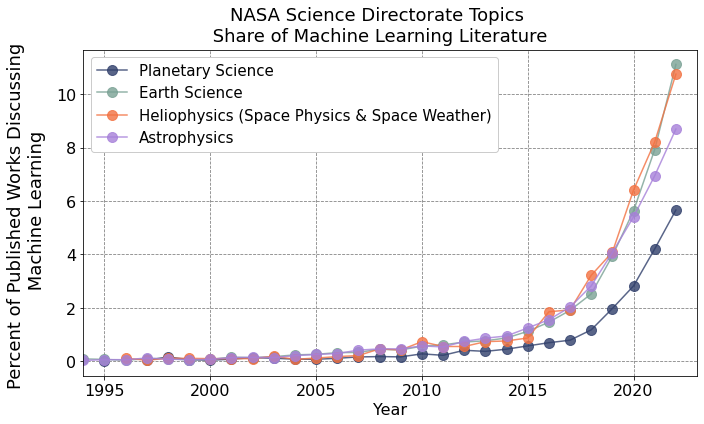

In [12]:
fig = plt.figure(figsize=(11, 6))

fig.suptitle('NASA Science Directorate Topics \n Share of Machine Learning Literature \n', 
             fontsize=18)

#create grid spec and axis
gs = plt.GridSpec(1, 1)#, hspace=0.0, wspace=0.0, right = 1.0)

#creating ax1 and ax2 for upper plots
ax = fig.add_subplot(gs[:,:])

#Somehow denote the actual, legend? Say what rate we are at?

ax.plot(frames['ML+Planetary'].index, frames['ML+Planetary'].Percent, '-o', 
        color = '#303f6b', markersize = 10, 
        label = 'Planetary Science', alpha = 0.8)
ax.plot(frames['ML+Earth'].index, frames['ML+Earth'].Percent, '-o', 
        color = '#79a194', markersize = 10, 
        label = 'Earth Science', alpha = 0.8)

ax.plot(frames['ML+HelioSP'].index, frames['ML+HelioSP'].Percent, '-o', 
        color = '#f27141', markersize = 10, 
        label = 'Heliophysics (Space Physics & Space Weather)', alpha = 0.8)

ax.plot(frames['ML+Astro'].index, frames['ML+Astro'].Percent, '-o', 
        color = '#a680d9', markersize = 10, 
        label = 'Astrophysics', alpha = 0.8)

ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Percent of Published Works Discussing \n Machine Learning', 
              fontsize = 18, labelpad = 10)

ax.grid(color='gray', linestyle='dashed')
ax.tick_params(labelsize=16)

ax.set_xlim([1994, 2023])

ax.legend(fontsize = 15, framealpha = 1)

fig.savefig('./Figures/NASADivision_Share_ML_{}.pdf'.format(searchTime))
